# Kaplan-Meier Estimator

The **Kaplan-Meier (KM) estimator** is a non-parametric method used to estimate the **reliability function** $ R(t) $ — the probability that a machine or system remains operational beyond time $ t $ — from **right-censored time-to-failure data**. It is widely used in **machine reliability**, **maintenance engineering**, and **industrial asset management**.

---

## Key Notation

- $ n_i $: Number of **units at risk** (still under observation and not yet failed) just prior to time $ t_i $.
- $ d_i $: Number of **failures** observed at time $ t_i $.
- $ t_1 < t_2 < \dots < t_k $: Distinct observed failure times.
- $ R(t) $: **Reliability** at time $ t $ (probability of no failure up to $ t $).

---

## Kaplan-Meier Formula

The KM estimator of the reliability function is:

$$
\hat{R}(t) = \prod_{t_i \leq t} \left(1 - \frac{d_i}{n_i}\right)
$$

Where:
- The product is taken over all observed failure times $ t_i \leq t $.
- $ 1 - \frac{d_i}{n_i} $ is the **conditional reliability** at $ t_i $ — the proportion of at-risk units that *did not fail* at that time.

---

## Step-by-Step Interpretation

1. Start with $ \hat{R}(0) = 1 $ (all units are operational at time 0).
2. At each failure time $ t_i $:
   - A fraction $ \frac{d_i}{n_i} $ of the at-risk units fail.
   - Multiply the current reliability by $ \left(1 - \frac{d_i}{n_i}\right) $.
3. Between failure times, $ \hat{R}(t) $ remains constant (step function).

---

## Example (Conceptual) — Machine Fleet

| Time $ t_i $ (hours) | $ n_i $ (units at risk) | $ d_i $ (failures) | Conditional Reliability | Cumulative $ \hat{R}(t_i) $ |
|----------------------|--------------------------|--------------------|--------------------------|------------------------------|
| 500                  | 50                       | 2                  | $ 1 - 2/50 = 0.96 $      | 0.960                        |
| 1200                 | 48                       | 5                  | $ 1 - 5/48 \approx 0.896 $| $ 0.960 \times 0.896 \approx 0.860 $ |
| 1800                 | 40                       | 3                  | $ 1 - 3/40 = 0.925 $     | $ 0.860 \times 0.925 \approx 0.796 $ |

Estimated reliability at 1800 hours: **79.6%** of units are still operational.

---

## Properties

- **Non-parametric**: No assumptions about the underlying failure distribution.
- **Step function**: Decreases only at observed failure times.
- **Handles censoring**: Units that are removed from observation (e.g., sold, retired, or still running at study end) are included in $ n_i $ up to their censoring time but not counted in $ d_i $.

---

## Variance (Greenwood’s Formula)

The variance of $ \hat{R}(t) $ can be estimated as:

$$
\widehat{\text{Var}}(\hat{R}(t)) = \hat{R}(t)^2 \sum_{t_i \leq t} \frac{d_i}{n_i (n_i - d_i)}
$$

Useful for constructing **confidence intervals** around the reliability curve.

---

## Applications in Maintenance & Reliability

- **Predicting system uptime**
- **Planning preventive maintenance schedules**
- **Warranty reserve estimation**
- **Comparing reliability across machine designs or suppliers**

---

## 📘 Example: Kaplan–Meier Estimator in Reliability Analysis

This example demonstrates how to use the **Kaplan–Meier estimator** to estimate the **reliability (survival)** function for a component population.  
It also illustrates how ignoring censored data can lead to an **underestimation** of reliability.

### 🧩 Import Required Libraries

In [1]:
from reliability.Nonparametric import KaplanMeier
import matplotlib.pyplot as plt

### ⚙️ Provide Data

In [2]:
f = [5248, 7454, 16890, 17200, 38700, 45000, 49390, 69040, 72280, 131900]
rc = [3961, 4007, 4734, 6054, 7298, 10190, 23060, 27160, 28690, 37100, 40060, 45670, 53000, 67000, 69630, 77350, 78470, 91680, 105700, 106300, 150400]

### 📈 Fit and Plot the Kaplan–Meier Model

Results from KaplanMeier (95% CI):
 Failure times  Censoring code (censored=0)  Items remaining  Kaplan-Meier Estimate  Lower CI bound  Upper CI bound
          3961                            0               31                      1               1               1
          4007                            0               30                      1               1               1
          4734                            0               29                      1               1               1
          5248                            1               28               0.964286        0.895548               1
          6054                            0               27               0.964286        0.895548               1
          7298                            0               26               0.964286        0.895548               1
          7454                            1               25               0.925714        0.826513               1
         10190                       

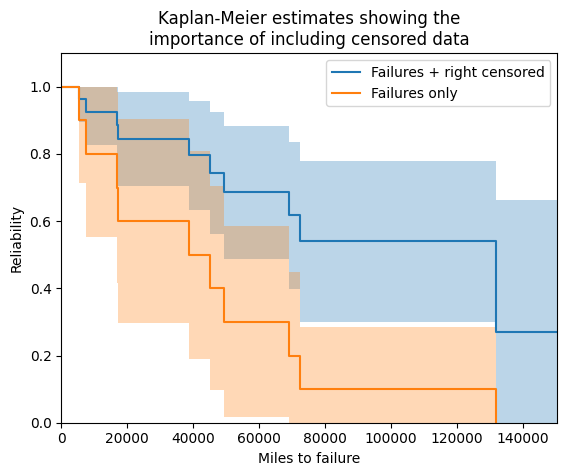

In [6]:
KaplanMeier(failures=f, right_censored=rc, label='Failures + right censored')
KaplanMeier(failures=f, label='Failures only')

plt.title('Kaplan-Meier estimates showing the\nimportance of including censored data')
plt.xlabel('Miles to failure')
plt.legend()
plt.show()

### 🧠 Interpretation of Kaplan–Meier Results (With and Without Censored Data)

The two Kaplan–Meier tables summarize the estimated **reliability (survival probability)** of an automotive component over time.

---

#### 🔹 1. Kaplan–Meier Including Censored Data
- **Dataset:** Contains both **failures** and **right-censored** observations (units that survived beyond the miles).  
- **Behavior:**
  - The **reliability curve decreases stepwise** only at failure miles (rows where Censoring code = 1).
  - Between failures, censored data keep the curve **flat**, showing that surviving items are still contributing to reliability.
- **Interpretation:**
  - The system starts at 100% reliability and gradually decreases to about **27%** by 131,900 miles.
  - The **95% confidence interval** widens at later miles, reflecting fewer surviving units and higher uncertainty.
  - Including censored data produces a **realistic reliability estimate** that accounts for both failed and surviving components.

---

#### 🔹 2. Kaplan–Meier Using Failures Only
- **Dataset:** Includes **only failure data** (no censored data).
- **Behavior:**
  - The reliability drops **after each failure**, reaching **0%** by 131,900 miles.
  - Because censored items are ignored, the curve declines more steeply.
- **Interpretation:**
  - The estimated reliability is **much lower** than in the full dataset because the surviving population is not represented.
  - The confidence intervals are also wider due to the smaller effective sample size.

---

#### 📊 Key Comparison
| Aspect | With Censored Data | Without Censored Data |
|:--|:--|:--|
| **Curve shape** | Gradual, stepwise decline | Sharp, continuous decline |
| **Final reliability** | ≈ 27% at 131,900 miles | 0% at 131,900 miles |
| **Accuracy** | Realistic (accounts for survivors) | Underestimates reliability |
| **Confidence bands** | Narrower (more data) | Wider (less data) |

---

#### ✅ Conclusion
Including **right-censored data** is **essential** for accurate reliability estimation.  
Without it, the model underestimates survival probability and overstates system degradation.  
The Kaplan–Meier estimator’s strength lies in its ability to **use all available information** — both failures and surviving items — to produce a balanced and reliable survival curve.
